In [1]:
print('Hey, Mate!')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


Hey, Mate!


In [2]:
path_to_train_data= r"C:\Users\tharw\OneDrive\Documents\Python Work\train.csv"
titanic_train_data= pd.read_csv(path_to_train_data)

In [3]:
titanic_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:


titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

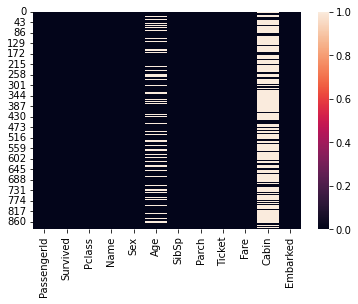

In [5]:
sns.heatmap(titanic_train_data.isnull())

In [6]:
titanic_train_data.drop('Cabin',axis=1, inplace=True)

<AxesSubplot:>

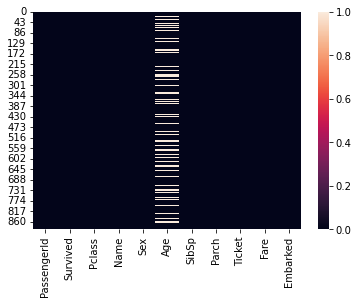

In [7]:
sns.heatmap(titanic_train_data.isnull())


In [8]:
mean_age = titanic_train_data['Age'].mean()
print(mean_age)

29.69911764705882


In [9]:
col_list=titanic_train_data.columns
titanic_train_data[col_list[5]].fillna(mean_age, inplace=True)

<AxesSubplot:>

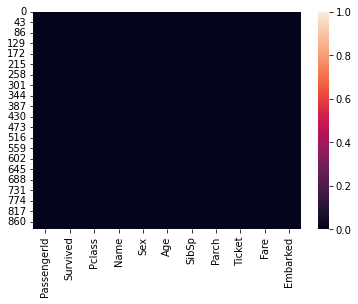

In [10]:
sns.heatmap(titanic_train_data.isnull())

In [11]:
dummy_Sex = pd.get_dummies(titanic_train_data['Sex'], drop_first=True)

In [12]:
titanic_train_data['Dummy_Sex']=dummy_Sex
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Dummy_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [13]:
titanic_train_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [14]:
titanic_train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Dummy_Sex
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [15]:
x_train=titanic_train_data[['PassengerId',  'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Dummy_Sex']]
y_train=titanic_train_data['Survived']

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
model = LogisticRegression(solver='liblinear', random_state=298)

In [18]:
model.fit(x_train,y_train)

LogisticRegression(random_state=298, solver='liblinear')

In [19]:
path_to_test_data= r"C:\Users\tharw\OneDrive\Documents\Python Work\test.csv"
titanic_test_data= pd.read_csv(path_to_test_data)

In [20]:
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

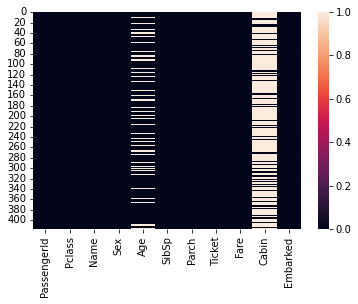

In [21]:
sns.heatmap(titanic_test_data.isnull())

In [22]:
titanic_test_data.drop('Cabin',axis=1, inplace=True)

<AxesSubplot:>

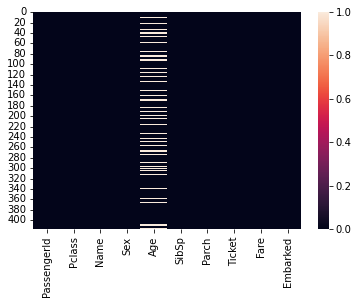

In [23]:
sns.heatmap(titanic_test_data.isnull())

In [24]:
mean_age_test = titanic_test_data['Age'].mean()
print(mean_age_test)

30.272590361445783


In [25]:
titanic_test_data['Age'].fillna(mean_age_test, inplace=True)

<AxesSubplot:>

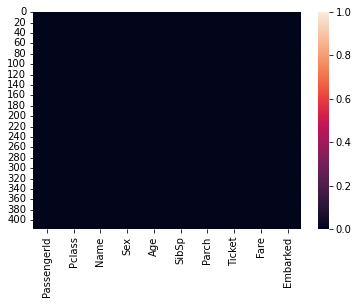

In [26]:
sns.heatmap(titanic_test_data.isnull())

In [27]:
dummy_Sex = pd.get_dummies(titanic_test_data['Sex'], drop_first=True)

In [28]:
titanic_test_data['Dummy_Sex']=dummy_Sex
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Dummy_Sex
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [29]:
titanic_test_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)


In [30]:
titanic_test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Dummy_Sex
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0


<AxesSubplot:>

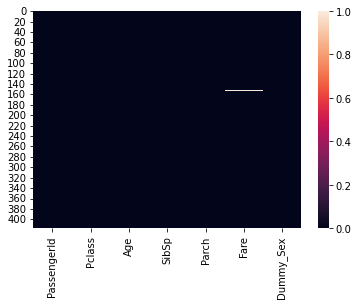

In [31]:
sns.heatmap(titanic_test_data.isnull())

In [32]:
mean_fare_test = titanic_test_data['Fare'].mean()
print(mean_fare_test)

35.6271884892086


In [33]:
titanic_test_data['Fare'].fillna(mean_fare_test, inplace=True)

<AxesSubplot:>

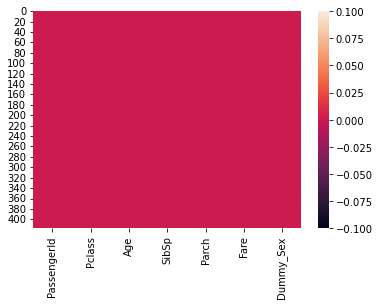

In [34]:
sns.heatmap(titanic_test_data.isnull())

In [35]:
model.score(x_train, y_train)

0.7991021324354658

In [36]:
confusion_matrix(y_train, model.predict(x_train))

array([[479,  70],
       [109, 233]], dtype=int64)

In [37]:
x_test=titanic_test_data[['PassengerId',  'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare','Dummy_Sex' ]]
prediction=model.predict(x_test)

In [38]:
print(prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [39]:
path_to_answer_data= r"C:\Users\tharw\OneDrive\Documents\Python Work\gender_submission.csv"
titanic_answer_data= pd.read_csv(path_to_answer_data)
titanic_answer_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [40]:
y_answer=titanic_answer_data['Survived']
help(titanic_answer_data)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order.
 |  
 |      .. versionchanged:: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order.
 |  
 |  index : Index or a

In [41]:
#Final Result
model.score(x_test,y_answer)

0.9545454545454546

In [42]:
titanic_test_data['Survived']=prediction
titanic_test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Dummy_Sex,Survived
0,892,3,34.5,0,0,7.8292,1,0
1,893,3,47.0,1,0,7.0000,0,0
2,894,2,62.0,0,0,9.6875,1,0
3,895,3,27.0,0,0,8.6625,1,0
4,896,3,22.0,1,1,12.2875,0,1


In [43]:
print(titanic_test_data)

     PassengerId  Pclass       Age  SibSp  Parch      Fare  Dummy_Sex  \
0            892       3  34.50000      0      0    7.8292          1   
1            893       3  47.00000      1      0    7.0000          0   
2            894       2  62.00000      0      0    9.6875          1   
3            895       3  27.00000      0      0    8.6625          1   
4            896       3  22.00000      1      1   12.2875          0   
..           ...     ...       ...    ...    ...       ...        ...   
413         1305       3  30.27259      0      0    8.0500          1   
414         1306       1  39.00000      0      0  108.9000          0   
415         1307       3  38.50000      0      0    7.2500          1   
416         1308       3  30.27259      0      0    8.0500          1   
417         1309       3  30.27259      1      1   22.3583          1   

     Survived  
0           0  
1           0  
2           0  
3           0  
4           1  
..        ...  
413        

In [45]:
titanic_answer_data['My_Prediction_for_Survied']=prediction
titanic_answer_data.head()

,PassengerId,Survived,My_Prediction_for_Survied
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1


In [53]:
titanic_answer_data['Survived']=prediction
titanic_answer_data.drop(['My_Prediction_for_Survied','Survied'],axis=1,inplace=True)
print('Done')

Done


In [54]:
titanic_answer_data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [55]:
titanic_answer_data.to_csv(r"C:\Users\tharw\OneDrive\Documents\Python Work\Kaggle_Titanic_submission.csv")

In [46]:
titanic_answer_data.to_csv(r"C:\Users\tharw\OneDrive\Documents\Python Work\19JE0865_submission.csv")